In [1]:
import pandas as pd

# For the Stop Words
from nltk.corpus import stopwords

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


import pandas as pd
import string
import seaborn as sns


%matplotlib inline


In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data =pd.read_csv("/content/gdrive/MyDrive/Google Colab/new_data_analyzed.csv", on_bad_lines='skip')

In [5]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,decide eat aware going take 2 hour beginning e...,decid eat awar go take 2 hour begin end tri mu...,"['decid', 'eat', 'awar', 'go', 'take', '2', 'h...",45,8,0.166667,3,0.062500,0.198485,0.412121
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,834,...,ive taken lot spin class year nothing compare ...,ive taken lot spin class year noth compar clas...,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",84,18,0.206897,1,0.011494,0.395455,0.571212
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,339,...,family diner buffet eclectic assortment large ...,famili diner buffet eclect assort larg chicken...,"['famili', 'diner', 'buffet', 'eclect', 'assor...",39,6,0.150000,2,0.050000,0.139935,0.522294
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,243,...,wow yummy different delicious favorite lamb cu...,wow yummi differ delici favorit lamb curri kor...,"['wow', 'yummi', 'differ', 'delici', 'favorit'...",24,5,0.208333,2,0.083333,0.315152,0.733838
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,535,...,cute interior owner gave u tour upcoming patio...,cute interior owner gave u tour upcom patioroo...,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",63,12,0.190476,1,0.015873,0.416234,0.490260


In [6]:
data.describe()

,stars,useful,funny,cool,data len,Review_Word_Count,Review_Char_Count,Stop_Word_Count,Stop_Words_%,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,3.842898,0.898989,0.257183,0.347033,496.402144,90.722297,496.402144,42.302243,0.449010,47.310203,8.016960,0.184987,2.530395,0.050851,0.262400,0.567343
std,1.354731,2.205195,1.010217,1.066387,421.737323,77.384209,421.737323,37.934657,0.075688,39.275553,6.192319,0.086716,2.996026,0.048639,0.231006,0.143912
min,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,216.000000,39.000000,216.000000,17.000000,0.413793,21.000000,4.000000,0.125000,1.000000,0.009009,0.131593,0.486364
50%,4.000000,0.000000,0.000000,0.000000,372.000000,68.000000,372.000000,31.000000,0.460317,36.000000,6.000000,0.173913,2.000000,0.043478,0.270062,0.568750
75%,5.000000,1.000000,0.000000,0.000000,634.000000,116.000000,634.000000,55.000000,0.500000,60.000000,10.000000,0.230769,4.000000,0.074627,0.402271,0.652817
max,5.000000,320.000000,98.000000,49.000000,5032.000000,974.000000,5032.000000,475.000000,0.833333,484.000000,90.000000,1.000000,44.000000,0.750000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_id               99999 non-null  object 
 1   user_id                 99999 non-null  object 
 2   business_id             99999 non-null  object 
 3   stars                   99999 non-null  int64  
 4   useful                  99999 non-null  int64  
 5   funny                   99999 non-null  int64  
 6   cool                    99999 non-null  int64  
 7   text                    99999 non-null  object 
 8   date                    99990 non-null  object 
 9   data len                99999 non-null  int64  
 10  Review_Word_Count       99999 non-null  int64  
 11  Review_Char_Count       99999 non-null  int64  
 12  Lowercase               99999 non-null  object 
 13  Cleaned                 99999 non-null  object 
 14  No_Stop_Words:Tokens    99999 non-null

In [8]:
data.isnull().sum()

review_id                 0
user_id                   0
business_id               0
stars                     0
useful                    0
funny                     0
cool                      0
text                      0
date                      9
data len                  0
Review_Word_Count         0
Review_Char_Count         0
Lowercase                 0
Cleaned                   0
No_Stop_Words:Tokens      0
No_Stop_Words:Sentence    2
Stop_Word_Count           0
Stop_Words_%              0
Lemmatized                2
Stemmed:Sentence          2
Stemmed:Tokens            0
Stemmed_Word_Count        0
Positive_Word_Count       0
Positive_Words_%          0
Negative_Word_Count       0
Negative_Words_%          0
Polarity                  0
Subjectivity              0
dtype: int64

In [9]:
to_sea_plot = data[['stars', 'useful', 'funny',
       'cool', 'data len', 'Polarity', 'Subjectivity']]

Plot Data


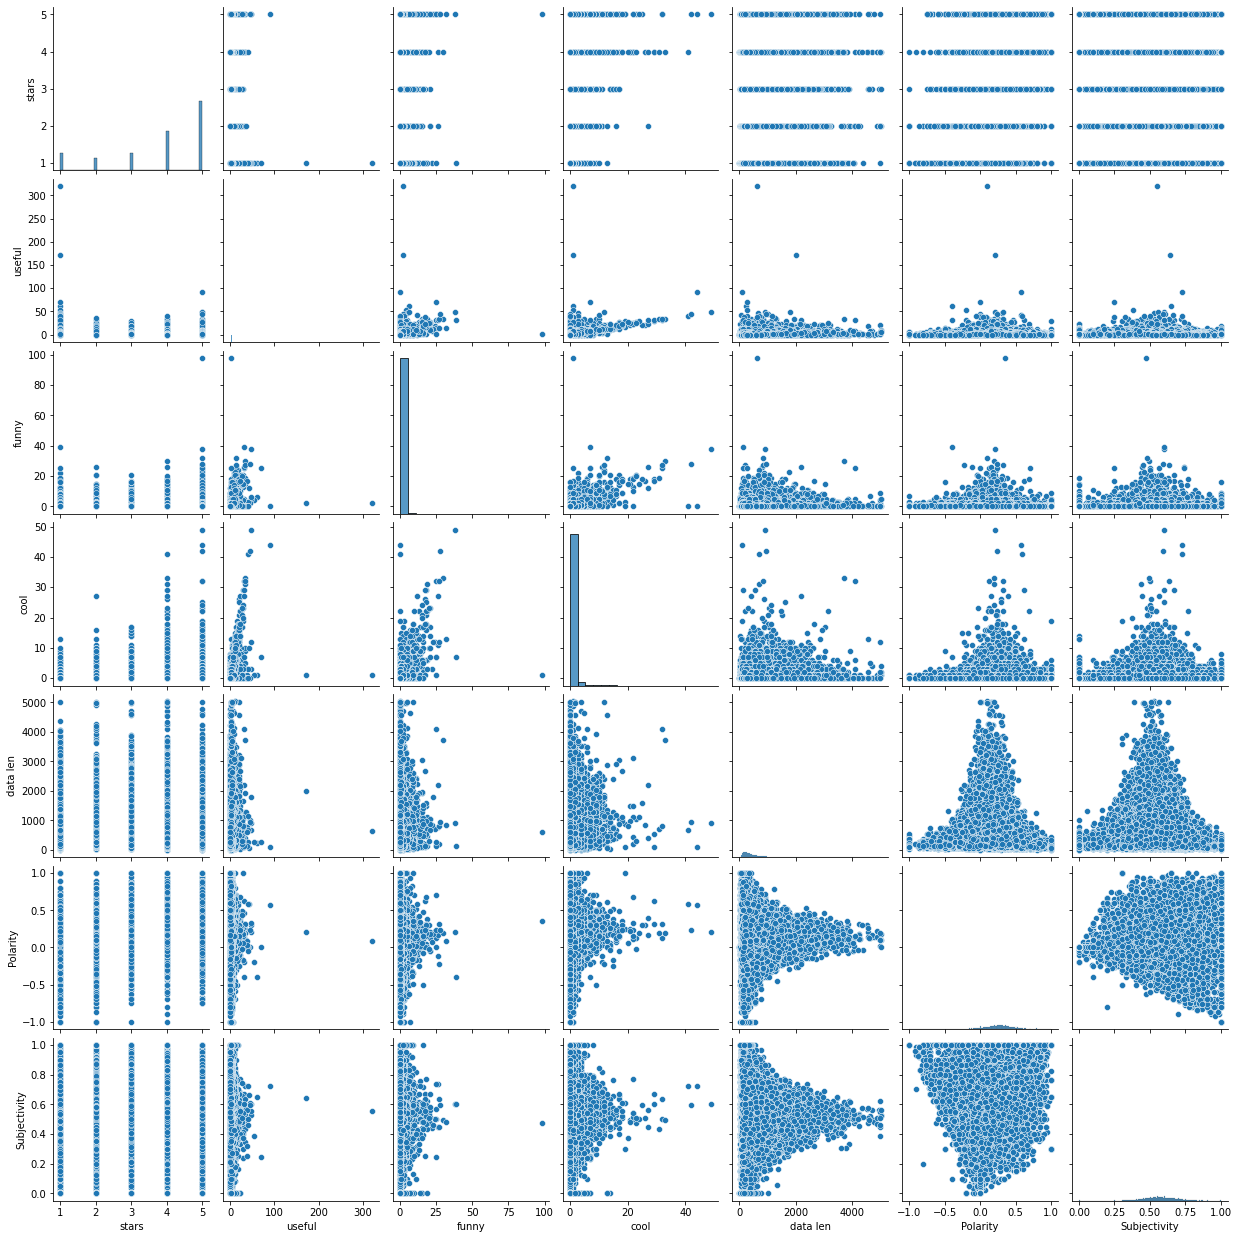

In [10]:
sns.pairplot(to_sea_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


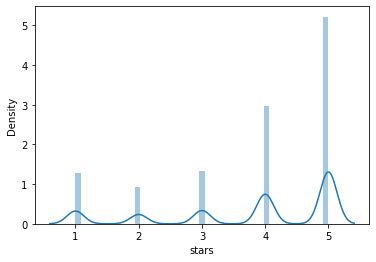

In [11]:
sns.distplot(data["stars"])

In [12]:
data["stars"].value_counts()

5    44391
4    25337
3    11362
1    10921
2     7988
Name: stars, dtype: int64

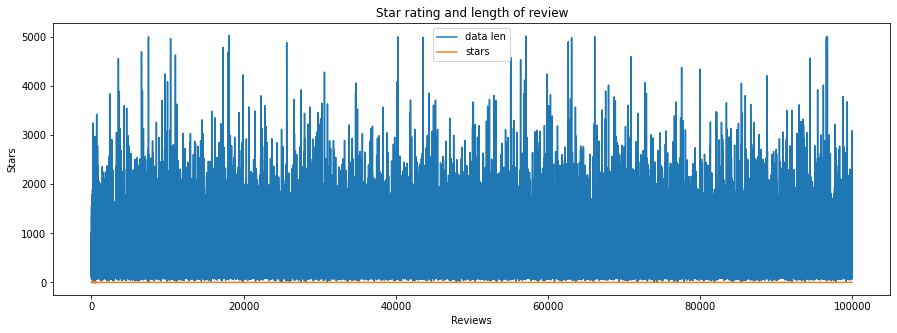

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
data['data len'].plot()
data['stars'].plot()
plt.title('Star rating and length of review')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.legend()


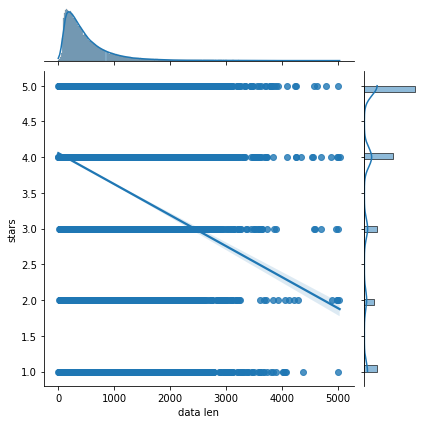

In [14]:
data["data len"] = data["text"].apply(len)
sns.jointplot(x=data["data len"],
              y=data["stars"],
              data=data, kind='reg')

In [15]:
#Method1 
X_Data = data["text"]
Y_Data = data["stars"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.58      0.70      0.63      3254
           2       0.37      0.18      0.24      2362
           3       0.39      0.29      0.33      3385
           4       0.46      0.57      0.51      7646
           5       0.76      0.74      0.75     13353

    accuracy                           0.60     30000
   macro avg       0.51      0.50      0.49     30000
weighted avg       0.59      0.60      0.59     30000



In [16]:
#Method 2
data = data[(data["stars"]==1) | (data["stars"]==5)]
X_Data = data["text"]
Y_Data = data["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)



pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.98      0.25      0.40      3346
           5       0.84      1.00      0.91     13248

    accuracy                           0.85     16594
   macro avg       0.91      0.63      0.66     16594
weighted avg       0.87      0.85      0.81     16594



In [17]:
# Method3: Using custom bag of words
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#model1 

data = data[(data["stars"]==1) | (data["stars"]==5)]
X_Data = data["text"]
Y_Data = data["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LogisticRegression())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))


In [ ]:
# Model 2

data = data[(data["stars"]==1) | (data["stars"]==5)]
X_Data = data["text"]
Y_Data = data["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.99      0.15      0.27      3346
           5       0.82      1.00      0.90     13248

    accuracy                           0.83     16594
   macro avg       0.91      0.58      0.58     16594
weighted avg       0.86      0.83      0.77     16594



In [ ]:
#Model 3

data = data[(data["stars"]==1) | (data["stars"]==5)]
X_Data = data["text"]
Y_Data = data["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.99      0.15      0.27      3346
           5       0.82      1.00      0.90     13248

    accuracy                           0.83     16594
   macro avg       0.91      0.58      0.58     16594
weighted avg       0.86      0.83      0.77     16594

